In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dx, dy = 1/512., 0.2/64.

x, y = np.mgrid[slice(0, 1, dx), slice(0, 0.2, dy)]

In [6]:
def extraer_datos(nombre_h5):

    with h5py.File(nombre_h5, 'r') as hdf:
        base_items = list(hdf.items())
        print(base_items, '\n')
        tasks = hdf.get('tasks')
        scales = hdf.get('scales')
        #scales_items = list(scales.items())
        #print(scales_items)
        tasks_items = list(tasks.items())
        print(tasks_items)

        T = np.array(tasks.get('T'))
        ρ = np.array(tasks.get('ρ'))
        u = np.array(tasks.get('u'))
        v = np.array(tasks.get('v'))
        ω = np.array(tasks.get('vort'))
        #s = np.array(tasks.get('s'))
        t = np.array(scales.get('sim_time'))
        #NN = np.array(tasks.get('NN'))

    return T, ρ, t, u, v, ω


In [7]:
T_dat , ρ_dat, t_dat, u_dat, v_dat, ω_dat = extraer_datos('katabatic_water/katabatic_water_s1/katabatic_water_s1_p0.h5')

[('scales', <HDF5 group "/scales" (11 members)>), ('tasks', <HDF5 group "/tasks" (9 members)>)] 

[('T', <HDF5 dataset "T": shape (200, 512, 64), type "<f8">), ('Ty', <HDF5 dataset "Ty": shape (200, 512, 64), type "<f8">), ('p', <HDF5 dataset "p": shape (200, 512, 64), type "<f8">), ('u', <HDF5 dataset "u": shape (200, 512, 64), type "<f8">), ('uy', <HDF5 dataset "uy": shape (200, 512, 64), type "<f8">), ('v', <HDF5 dataset "v": shape (200, 512, 64), type "<f8">), ('vort', <HDF5 dataset "vort": shape (200, 512, 64), type "<f8">), ('vy', <HDF5 dataset "vy": shape (200, 512, 64), type "<f8">), ('ρ', <HDF5 dataset "ρ": shape (200, 512, 64), type "<f8">)]


In [13]:
u_dat.shape

(200, 512, 64)

In [9]:
0.2*15

3.0

(0, 0.2)

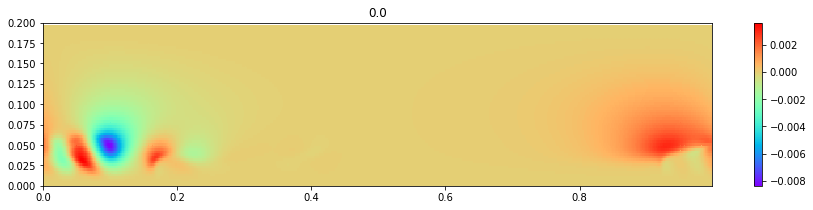

In [18]:
plt.figure(figsize=(15,3))
#fig.suptitle('$$', fontsize = 14, fontweight='bold', x = 0.8, y = 0.95) # 'T \ ($^oC$)' #'$N^2 \ (s^{-2})$'
#fig.suptitle('$N^2 \ (s^{-2})$', fontsize = 14, fontweight='bold')
p = plt.pcolormesh(x, y, v_dat[199,:,:], cmap='rainbow') #, vmin = -1.15, vmax = 1.5 #norm= colors.Normalize(vmin=-1.15,vmax=1.5)
plt.colorbar(p)
#p.set_clim(-1.15, 1.5) #Para plotear brunt-vaisala
plt.title(str(t_dat[0]))
plt.ylim(0,0.2)

In [14]:
k = 1

for i in range(0,200):

    fig = plt.figure(figsize=((15,3)))
    p = plt.pcolormesh(x, y, ω_dat[i,:,:], cmap='rainbow')
    plt.colorbar(p)
    plt.title(str(t_dat[i]))
    plt.ylim(0,0.2)

    h = '%03d'%k
    plt.savefig('snapshots/s_1/s1_kat'+ h)
    k += 1
    plt.close(fig)

print('**DONE**')


**DONE**


In [65]:
T_i = np.copy(x)*0 + 10

In [67]:
x.shape

(512,)

In [64]:
T_i.shape

(512,)

In [59]:
T_i[0:20, :20] = np.ones((20,20))*5
T_i[492:512, :20] = np.ones((20,20))*5

IndexError: too many indices for array

In [60]:
T_i

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10

TypeError: Incompatible X, Y inputs to pcolormesh; see help(pcolormesh)

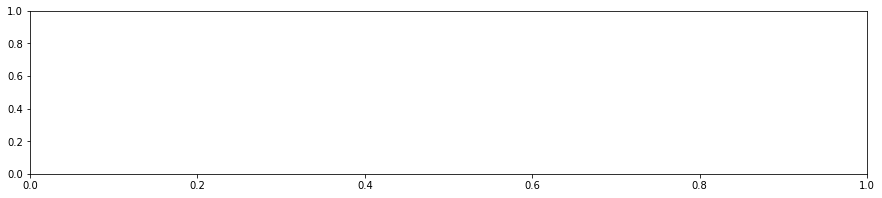

In [57]:
fig = plt.figure(figsize=((15,3)))
p = plt.pcolormesh(x, y, T_i, cmap='rainbow')
plt.colorbar(p)
plt.title(str(t_dat[0]))
plt.ylim(0,0.2)

In [25]:
x = np.linspace(0, np.pi, 512)

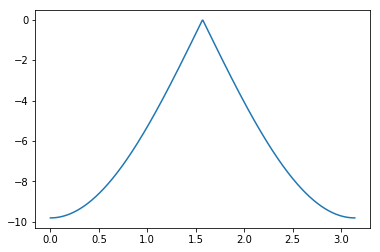

In [36]:
plt.plot(x, np.abs(np.cos(x))*-9.8)

In [46]:
a = np.linspace(np.pi, np.pi*2,50)
b = np.linspace(0,1,50)
A, B = np.meshgrid(a, b)
c = np.random.random(A.shape)

(0, 1)

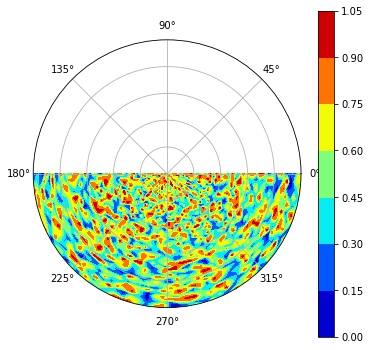

In [53]:
#actual plotting
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(a, b, c, cmap='jet') #you can use de pcolormesh function too.
plt.colorbar(ctf)
ax.set_ylim((0,1))